### Linear equations:
Linear equations have the form ax + by + cz = d
Any equation that cannot be written in that form is to be called *non-linear.*

**How to solve linear equations:**
**Step 1:** Re-write the equations to matrix forms:
a1x + b1y + c1z = d1
a2x + b2y + c2z = d2
a3x + b3y + c3z = d3

will become

A x X = B

**Step 2:** Solve it as matrices
X = (A^-1).B

In [1]:
# Solve linear equations using numpy

""" Want to solve this system of equations:
2x + 4y - z = 9
x - 5y + 16z = 25
7x - y - 2z = 30"""

# step 1: input data as matrices

import numpy as np
A = np.array([[2,4,-1], [1,-5,16], [7,-1,-2]])
B = np.array([9,25,30])

print("Matrix A: ")
print(A)
print("Matrix B: ")
print(B)

Matrix A: 
[[ 2  4 -1]
 [ 1 -5 16]
 [ 7 -1 -2]]
Matrix B: 
[ 9 25 30]


In [25]:
# step 2: solve the equation using matrices:

X = np.linalg.solve(A,B)

print("Solution x, y, z: ")
print(X)

Solution x, y, z: 
[4.70253165 0.23417722 1.34177215]


### Gekko package:
I found it from a YouTube channel APMonitor.com

How to install it:
**Check if I have pip:** In bash: which pip pip -V

**Install gekko:** pip install gekko

In [3]:
from gekko import GEKKO

 ### Non-linear equations:

In [13]:
""" Create a model named GEKKO. 
In this model, define a variable y and assign a guess value of 2.
Then write down the equation we need to solve.
Then call APOPT. Finally solve it and print out the value."""

""" I can choose to display the whole process of solving equation or hide it"""

m = GEKKO()
x = m.Var(value=2)
m.Equation(3*x**2 - 2*x + 5 == 0)
m.options.SOLVER=1
m.solve(disp=False)
print("Solution for 3x^2 - 2x + 5 = 0 is:")
print(x.value)

Solution for 3x^2 - 2x + 5 = 0 is:
[0.3333333]


In [14]:
# Example 2: solve this equation: 7x^2 - 5x + 12 = 0

m = GEKKO()
x = m.Var(value=2)
m.Equation(7*x**2 - 5*x + 12 == 0)
m.options.SOLVER = 1
m.solve(disp=False)
print("Solution for 7x^2 - 5x + 12 = 0 is:")
print(x.value)

Solution for 7x^2 - 5x + 12 = 0 is:
[0.3571429]


### Solve Linear Equations with Gekko:

In [15]:
""" Want to solve this system of equations again with Gekko:
2x + 4y - z = 9
x - 5y + 16 = 25
7x - y - 2z = 30"""

m = GEKKO()
x = m.Var()
y = m.Var()
z = m.Var()
m.Equation(2*x + 4*y - z == 9)
m.Equation(x - 5*y + 16 == 25)
m.Equation(7*x - y - 2*z == 30)
m.solve(disp=False)
print("Solution x, y, z:")
print(x.value, y.value, z.value)

Solution x, y, z:
([-3.5], [-2.5], [-26.0])


In [22]:
""" Want to solve this system of equations again with Gekko:
x + 2y = 0
x^2 + y^2 = 1"""

m = GEKKO()
x = m.Var(value=-1)
y = m.Var(value=1)
m.Equation(x + 2*y == 0)
m.Equation(x**2 + y**2 < 1)
m.solve(disp=False)
print(x.value, y.value)

([-0.8870795], [0.4435398])


### Differential Equations

Can be solved in Numpy or Gekko

In [33]:
# Example: solve this ODE: k*dy/dt = -ty
# y(0) = 5, t goes from 0 -> 20

import numpy as np

m = GEKKO()
k = 10
y = m.Var(value=5)

#time space from 0 to 20
tm = np.linspace(0,20)

# model time: only used for dynamic modes (IMODE>3)
m.time = tm
t = m.Param(value=tm)
m.Equation(k*y.dt() == -t*y)

# has to have IMODE to solve the ODE
m.options.IMODE=4
m.solve(disp=False)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

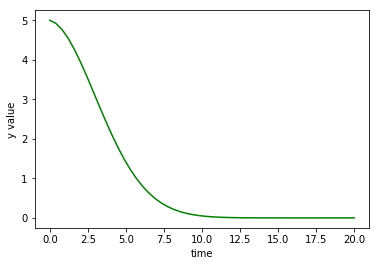

In [35]:
plt.plot(tm, y.value, 'g-', label="Numerical")
plt.xlabel("time")
plt.ylabel("y value")
plt.show()

### Solve this ODE using Scipy:

In [36]:
import scipy
from scipy.integrate import odeint

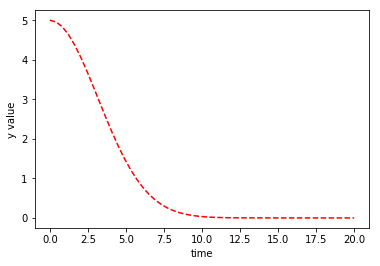

In [37]:
# define a model for y and t:

def model(y,t):
    dydt = -t*y/k
    return dydt

y_odeint = odeint(model, 5, tm)

plt.plot(tm, y_odeint, 'r--', label="OdeInt")
plt.xlabel("time")
plt.ylabel("y value")
plt.show()

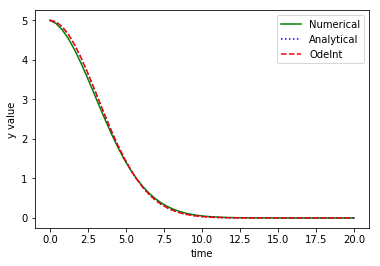

In [42]:
# analytical solution:
y_ana = 5*np.exp(-tm**2/(2*k))

plt.plot(tm, y.value, 'g-', label="Numerical")
plt.plot(tm, y_ana, 'b:', label="Analytical")
plt.plot(tm, y_odeint, 'r--', label="OdeInt")
plt.legend()
plt.xlabel("time")
plt.ylabel("y value")
plt.show()